 Data Manipulation library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

import datetime as dt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

import copy

import yfinance as yf

In [2]:
x=dt.date.today()
y=x.replace(year=x.year-1)
z=x.replace(day=x.day+1)

In [3]:
tickerSymbol = "^NSEI"
datayf = yf.Ticker(tickerSymbol)
data = datayf.history(start=y, end=x)
data

Open          High           Low  \
Date                                                                  
2022-03-21 00:00:00+05:30  17329.500000  17353.349609  17096.400391   
2022-03-22 00:00:00+05:30  17120.400391  17334.400391  17006.300781   
2022-03-23 00:00:00+05:30  17405.050781  17442.400391  17199.599609   
2022-03-24 00:00:00+05:30  17094.949219  17291.750000  17091.150391   
2022-03-25 00:00:00+05:30  17289.000000  17294.900391  17076.550781   
...                                 ...           ...           ...   
2023-03-13 00:00:00+05:30  17421.900391  17529.900391  17113.449219   
2023-03-14 00:00:00+05:30  17160.550781  17224.650391  16987.099609   
2023-03-15 00:00:00+05:30  17166.449219  17211.349609  16938.900391   
2023-03-16 00:00:00+05:30  16994.650391  17062.449219  16850.150391   
2023-03-17 00:00:00+05:30  17111.800781  17145.800781  16958.150391   

                                  Close  Volume  Dividends  Stock Splits  
Date                                                                      
2022-03-21 00:00:00+05:30  17117.599609  285500        0.0           0.0  
2022-03-22 00:00:00+05:30  17315.500000  338300        0.0           0.0  
2022-03-23 00:00:00+05:30  17245.650391  292100        0.0           0.0  
2022-03-24 00:00:00+05:30  17222.750000  290300        0.0           0.0  
2022-03-25 00:00:00+05:30  17153.000000  237100        0.0           0.0  
...                                 ...     ...        ...           ...  
2023-03-13 00:00:00+05:30  17154.300781  254900        0.0           0.0  
2023-03-14 00:00:00+05:30  17043.300781  290600        0.0           0.0  
2023-03-15 00:00:00+05:30  16972.150391  248200        0.0           0.0  
2023-03-16 00:00:00+05:30  16985.599609  349800        0.0           0.0  
2023-03-17 00:00:00+05:30  17100.050781  408100        0.0           0.0  

[249 rows x 7 columns]

In [4]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [5]:
data.describe()

Open          High           Low         Close         Volume  \
count    249.000000    249.000000    249.000000    249.000000     249.000000   
mean   17355.522300  17438.978139  17246.213828  17343.619082  271769.879518   
std      827.328534    814.139347    833.138220    826.763398   72931.866793   
min    15272.650391  15382.500000  15183.400391  15293.500000       0.000000   
25%    16870.550781  17037.599609  16747.699219  16858.599609  227700.000000   
50%    17525.449219  17642.150391  17434.050781  17530.849609  259900.000000   
75%    17952.550781  18049.650391  17852.050781  17944.250000  295700.000000   
max    18871.949219  18887.599609  18778.199219  18812.500000  651600.000000   

       Dividends  Stock Splits  
count      249.0         249.0  
mean         0.0           0.0  
std          0.0           0.0  
min          0.0           0.0  
25%          0.0           0.0  
50%          0.0           0.0  
75%          0.0           0.0  
max          0.0           0.0

In [6]:
print('shape of data :',data.shape)
print("*******************************************")
print('name of column present :',data.columns)

shape of data : (249, 7)
*******************************************
name of column present : Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


<AxesSubplot:>

<Figure size 144x144 with 0 Axes>

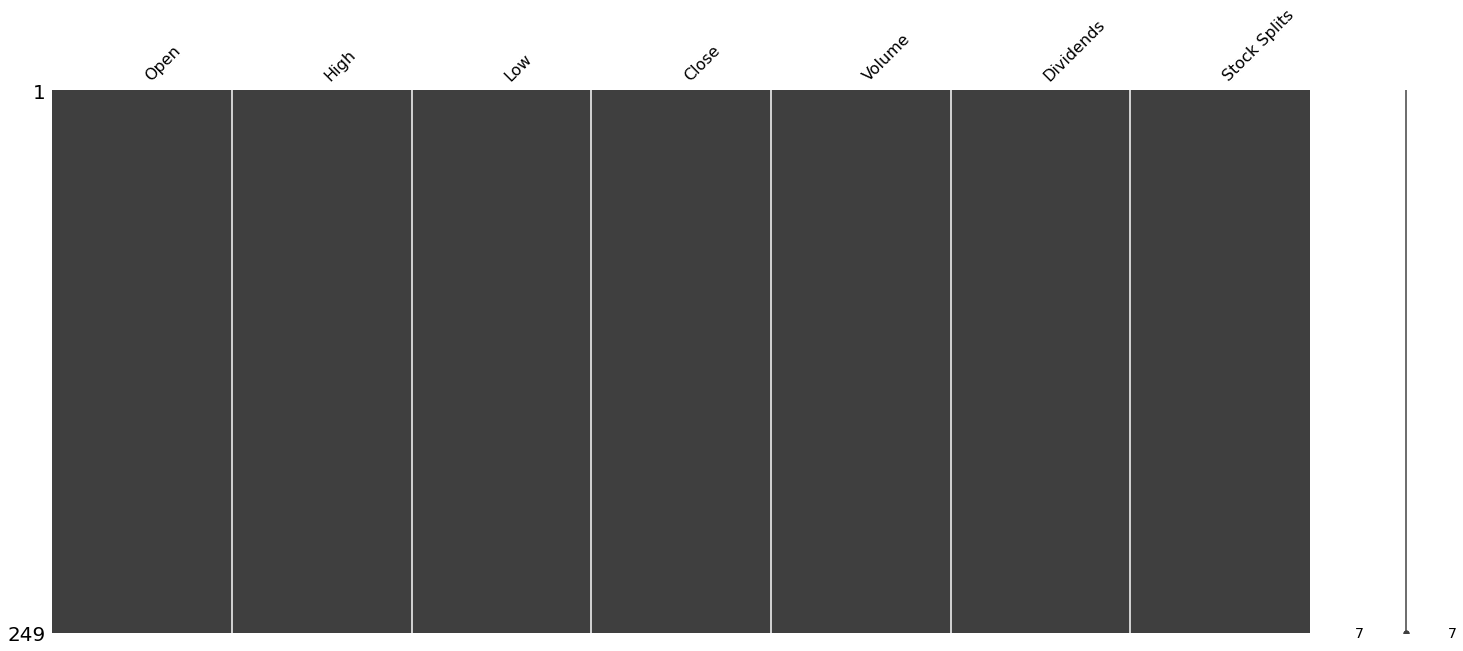

In [7]:
# checking Missing Info
plt.figure(figsize=(2,2))
msno.matrix(data)

 insight from graph : there is no missing Info in our data

In [8]:
# statistical insights into the data
data.describe().T

count           mean           std           min            25%  \
Open          249.0   17355.522300    827.328534  15272.650391   16870.550781   
High          249.0   17438.978139    814.139347  15382.500000   17037.599609   
Low           249.0   17246.213828    833.138220  15183.400391   16747.699219   
Close         249.0   17343.619082    826.763398  15293.500000   16858.599609   
Volume        249.0  271769.879518  72931.866793      0.000000  227700.000000   
Dividends     249.0       0.000000      0.000000      0.000000       0.000000   
Stock Splits  249.0       0.000000      0.000000      0.000000       0.000000   

                        50%            75%            max  
Open           17525.449219   17952.550781   18871.949219  
High           17642.150391   18049.650391   18887.599609  
Low            17434.050781   17852.050781   18778.199219  
Close          17530.849609   17944.250000   18812.500000  
Volume        259900.000000  295700.000000  651600.000000  
Dividends          0.000000       0.000000       0.000000  
Stock Splits       0.000000       0.000000       0.000000

<AxesSubplot:>

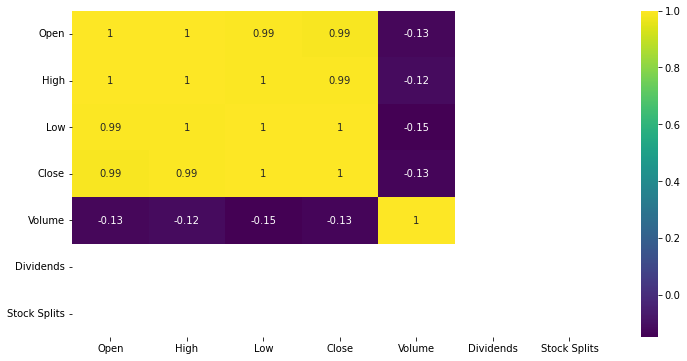

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot = True,cmap = 'viridis')

<AxesSubplot:xlabel='Date'>

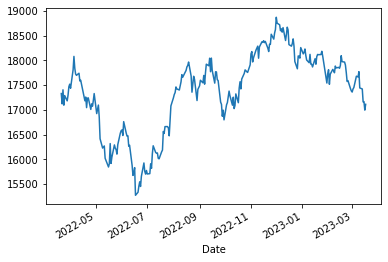

In [10]:
# for general Idea hows stock graph look like
data.Open.plot()

Text(0.5, 0, 'Open_price')

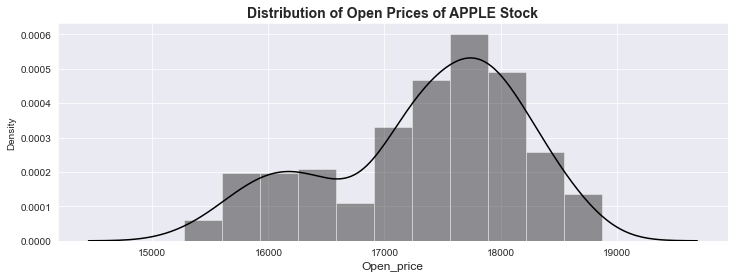

In [11]:
# normal distribution curve
sns.set_style('darkgrid')
plt.figure(figsize=(12,4))
sns.distplot(data['Open'],color = 'k')
plt.title('Distribution of Open Prices of APPLE Stock',fontweight = 'bold',fontsize= 14)
plt.xlabel('Open_price',fontsize=12)

In [12]:
print("Maximum Open price of stock ever obtained:",data['Open'].max())
print("*"*50)
print("Minimum Open price of stock ever obtained :",data['Open'].min())
print("*"*50)

Maximum Open price of stock ever obtained: 18871.94921875
**************************************************
Minimum Open price of stock ever obtained : 15272.650390625
**************************************************


Maximum close price of stock ever obtained: 18812.5
Minimum close price of stock ever obtained: 15293.5


**************************************************
Maximum high price of stock ever obtained: 18887.599609375
Minimum high price of stock ever obtained: 15382.5


**************************************************
Maximum low price of stock ever obtained: 18778.19921875
Minimum low price of stock ever obtained: 15183.400390625


after watcing curve this curve is bimode(right skewd distribution)


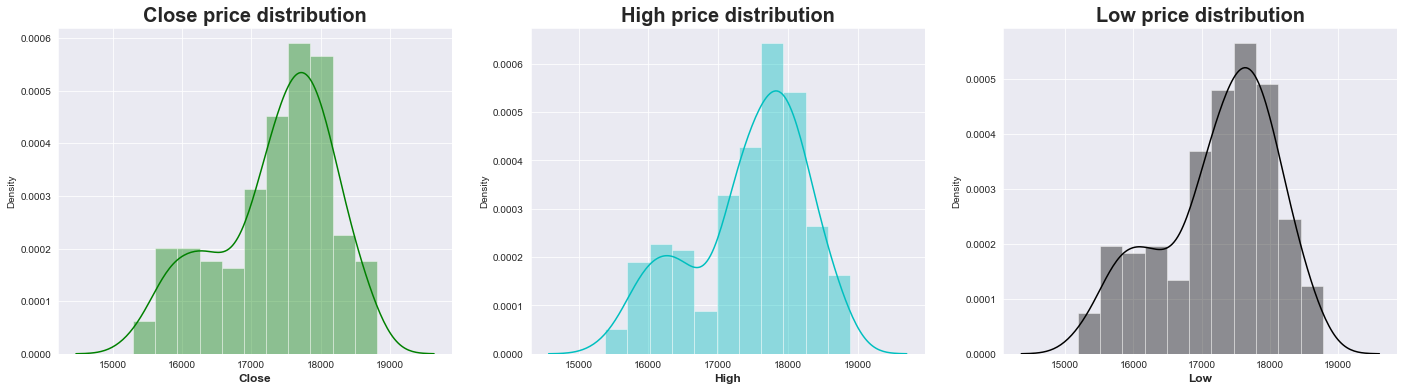

In [13]:
# Close price high price and low price
fig,axes=plt.subplots(1,3,figsize=(24,6))

#Close price
plt.subplot(1,3,1)
plt.title('Close price distribution',fontweight='bold',fontsize=20)
plt.xlabel('close_price',fontweight='bold',fontsize=12)
sns.distplot(data['Close'],color='g')

print('Maximum close price of stock ever obtained:',data['Close'].max())
print('Minimum close price of stock ever obtained:',data['Close'].min())
print('\n')
print("*"*50)

#High price
plt.subplot(1,3,2)
plt.title('High price distribution',fontweight='bold',fontsize=20)
plt.xlabel('high_price',fontweight='bold',fontsize=12)
sns.distplot(data['High'],color='c')

print('Maximum high price of stock ever obtained:',data['High'].max())
print('Minimum high price of stock ever obtained:',data['High'].min())
print('\n')
print("*"*50)

#Low price
plt.subplot(1,3,3)
plt.title('Low price distribution',fontweight='bold',fontsize=20)
plt.xlabel('low_price',fontweight='bold',fontsize=12)
sns.distplot(data['Low'],color='black')

print('Maximum low price of stock ever obtained:',data['Low'].max())
print('Minimum low price of stock ever obtained:',data['Low'].min())

print('\n')

print("after watcing curve this curve is bimode(right skewd distribution)")

In [14]:
# converting String object to datetime for analysis
#data['Date'] = pd.to_datetime(data['Date'])
#data.head(2)

In [15]:
# set date column as index
#data.set_index('Date',inplace=True)

In [16]:
fig=px.line(x=data.index,y=data['Open'])
fig.update_layout(template='plotly_dark',title='Month wise open price distribution',xaxis_title = 'Month',yaxis_title='Open_price')

In [17]:
#Getting the dates on which the maximum and the minimum open price values of the stocks were observed.

for i in range(len(data['Open'].index)):
    if (data['Open'][i]==data['Open'].max()):
        print('The maximum stock price of APPL were observed on: ', data.index[i])
        print("*"*50)
    elif (data['Open'][i]==data['Open'].min()):
        print('The minimum stock price of APPL were observed on: ', data.index[i])
        print("*"*50)
    else:
        pass

The minimum stock price of APPL were observed on:  2022-06-17 00:00:00+05:30
**************************************************
The maximum stock price of APPL were observed on:  2022-12-01 00:00:00+05:30
**************************************************


In [18]:
fig=make_subplots(rows=1,cols=3)

#Close price
fig.add_trace(go.Scatter(x=data.index,y=data['Close'],mode='markers',name='close_price'),row=1,col=1)


#High price
fig.add_trace(go.Scatter(x=data.index,y=data['High'],mode='markers',name='high_price'),row=1,col=2)


#Low price
fig.add_trace(go.Scatter(x=data.index,y=data['Low'],mode='markers',name='low_price'),row=1,col=3)

fig.update_layout(template='plotly_dark',title='Month wise distribution',xaxis_title='Month',yaxis_title='price')

volme of stock traded

In [19]:
fig=px.line(x=data.index,y=data['Volume'])
fig.update_layout(template='plotly_dark',title='Month wise volume traded',xaxis_title='Month',yaxis_title='volume')
fig.show()

print('Maximum low price of stock ever obtained:',data['Low'].max())
print('Minimum low price of stock ever obtained:',data['Low'].min())

print('\n')

for i in range(len(data['Volume'].index)):
    if (data['Volume'][i]==data['Volume'].max()):
        print('The maximum volume ever traded was on: ', data.index[i])
    elif (data['Volume'][i]==data['Volume'].min()):
        print('The minimum volume ever traded was on: ', data.index[i])
    else:
        pass

Maximum low price of stock ever obtained: 18778.19921875
Minimum low price of stock ever obtained: 15183.400390625


The maximum volume ever traded was on:  2022-05-31 00:00:00+05:30
The minimum volume ever traded was on:  2022-08-16 00:00:00+05:30


In [20]:
fig=px.line(x=data.index,y=data['Volume']*data['Open'])
fig.update_layout(template='plotly_dark',title='Month wise volume traded',xaxis_title='Month',yaxis_title='amount')
fig.show()

#model creation

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import math

In [22]:
#PREPARING THE DATA

#data.sort_index(ascending=False,axis=0,inplace=True)
df=data[['Close']]
df.index = pd.to_datetime(df.index)
#df.set_index('Date',inplace=True)
df

Close
Date                                   
2022-03-21 00:00:00+05:30  17117.599609
2022-03-22 00:00:00+05:30  17315.500000
2022-03-23 00:00:00+05:30  17245.650391
2022-03-24 00:00:00+05:30  17222.750000
2022-03-25 00:00:00+05:30  17153.000000
...                                 ...
2023-03-13 00:00:00+05:30  17154.300781
2023-03-14 00:00:00+05:30  17043.300781
2023-03-15 00:00:00+05:30  16972.150391
2023-03-16 00:00:00+05:30  16985.599609
2023-03-17 00:00:00+05:30  17100.050781

[249 rows x 1 columns]

In [23]:
#To array format
df_val=df.values 
df_val

array([[17117.59960938],
       [17315.5       ],
       [17245.65039062],
       [17222.75      ],
       [17153.        ],
       [17222.        ],
       [17325.30078125],
       [17498.25      ],
       [17464.75      ],
       [17670.44921875],
       [18053.40039062],
       [17957.40039062],
       [17807.65039062],
       [17639.55078125],
       [17784.34960938],
       [17674.94921875],
       [17530.30078125],
       [17475.65039062],
       [17173.65039062],
       [16958.65039062],
       [17136.55078125],
       [17392.59960938],
       [17171.94921875],
       [16953.94921875],
       [17200.80078125],
       [17038.40039062],
       [17245.05078125],
       [17102.55078125],
       [17069.09960938],
       [16677.59960938],
       [16682.65039062],
       [16411.25      ],
       [16301.84960938],
       [16240.04980469],
       [16167.09960938],
       [15808.        ],
       [15782.15039062],
       [15842.29980469],
       [16259.29980469],
       [16240.29980469],


In [24]:
#Splitting the dataset to train and test (80% train and 20% test data)

train=df_val[:200]   
test=df_val[200:]

In [25]:
#Scaling the features to be valued between 0 & 1. 
#Scaling ensures optimal performance of the model.

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_val)

In [26]:
#Creting x_train and y_train for 60 timesteps
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

#Converting to 3-D array because LSTM model requires 3-D input.
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [27]:
# Build the LSTM model
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))


#Compiling 
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Fitting
model.fit(x_train, y_train, epochs = 145, batch_size = 10)

Epoch 1/145
14/14 [==============================] - 8s 57ms/step - loss: 0.1163
Epoch 2/145
14/14 [==============================] - 1s 57ms/step - loss: 0.0293
Epoch 3/145
14/14 [==============================] - 1s 55ms/step - loss: 0.0242
Epoch 4/145
14/14 [==============================] - 1s 55ms/step - loss: 0.0220
Epoch 5/145
14/14 [==============================] - 1s 51ms/step - loss: 0.0201
Epoch 6/145
14/14 [==============================] - 1s 55ms/step - loss: 0.0166
Epoch 7/145
14/14 [==============================] - 1s 55ms/step - loss: 0.0169
Epoch 8/145
14/14 [==============================] - 1s 58ms/step - loss: 0.0158
Epoch 9/145
14/14 [==============================] - 1s 60ms/step - loss: 0.0169
Epoch 10/145
14/14 [==============================] - 1s 56ms/step - loss: 0.0148
Epoch 11/145
14/14 [==============================] - 1s 56ms/step - loss: 0.0138
Epoch 12/145
14/14 [==============================] - 1s 53ms/step - loss: 0.0141
Epoch 13/145
14/14 [=====

In [28]:
inputs = df_val[len(df_val) - len(test) - 60:]
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [29]:
#Test data
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [30]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predictions = model.predict(X_test)

#Undo scaling
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 2s 27ms/step


In [31]:
#Root mean squared error
rmse=np.sqrt(np.mean(np.power((predictions),2)))
rmse

17891.143

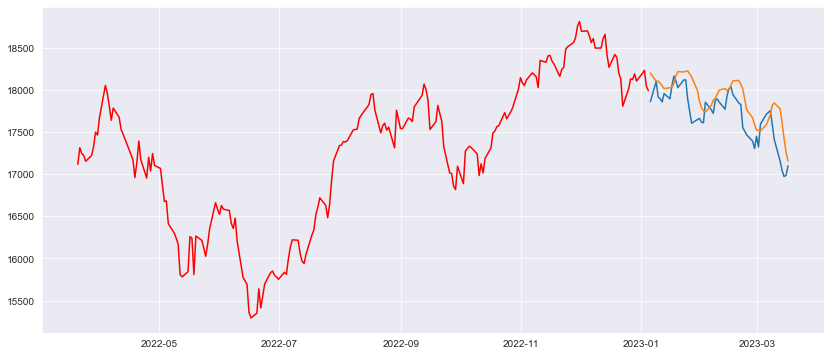

In [32]:
#Plotting all the values
train = df[:200]
test = df[200:]
test['Predictions'] = predictions
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
plt.plot(train['Close'],color='r')
plt.plot(test[['Close','Predictions']])

In [33]:
data.index = pd.to_datetime(data.index)

DICKEY FULLER TEST

In [34]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(data["Close"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.501153
p-value: 0.532941


Making the differencing and ploting the autocorelation plots

Partial autocorrelation plots to find the p value relate to Auto regression(AR)

In [35]:
data_close = pd.DataFrame(data['Close'])
data_close.head()

Close
Date                                   
2022-03-21 00:00:00+05:30  17117.599609
2022-03-22 00:00:00+05:30  17315.500000
2022-03-23 00:00:00+05:30  17245.650391
2022-03-24 00:00:00+05:30  17222.750000
2022-03-25 00:00:00+05:30  17153.000000

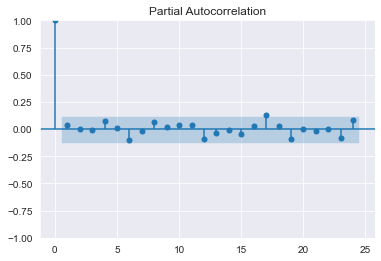

In [36]:
# PACF plot of 1st differenced series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(data_close['Close'].diff().dropna())
plt.show()

Auto correlation plots to find the q value realted to moving average (MA)

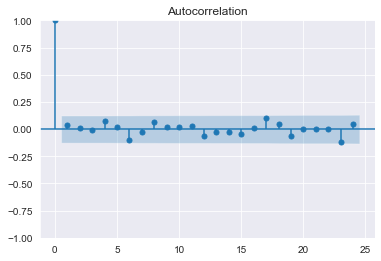

In [37]:
plot_acf(data_close['Close'].diff().dropna())
plt.show()

ARIMA MODEL FITTING

In [38]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data.Close, order=(2,1,0))
model_fit = model.fit()

C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [39]:
model_arima = ARIMA(data_close['Close'],order=(1,1,0))
arima_fit = model_arima.fit()
arima_fit.summary()

C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  249
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1606.688
Date:                Sun, 19 Mar 2023   AIC                           3217.377
Time:                        22:40:24   BIC                           3224.404
Sample:                             0   HQIC                          3220.205
                                - 249                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0483      0.055      0.872      0.383      -0.060       0.157
sigma2      2.479e+04   2072.394     11.960      0.000    2.07e+04    2.88e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.16
Prob(Q):                              0.85   Prob(JB):                         0.56
Heteroskedasticity (H):               0.49   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
prediction = pd.DataFrame(arima_fit.predict(typ='levels'))
prediction.columns=['Close']
prediction

Close
Date                                   
2022-03-21 00:00:00+05:30      0.000000
2022-03-22 00:00:00+05:30  17137.648531
2022-03-23 00:00:00+05:30  17325.061605
2022-03-24 00:00:00+05:30  17242.275590
2022-03-25 00:00:00+05:30  17221.643562
...                                 ...
2023-03-13 00:00:00+05:30  17404.363125
2023-03-14 00:00:00+05:30  17141.806479
2023-03-15 00:00:00+05:30  17037.937790
2023-03-16 00:00:00+05:30  16968.712742
2023-03-17 00:00:00+05:30  16986.249412

[249 rows x 1 columns]

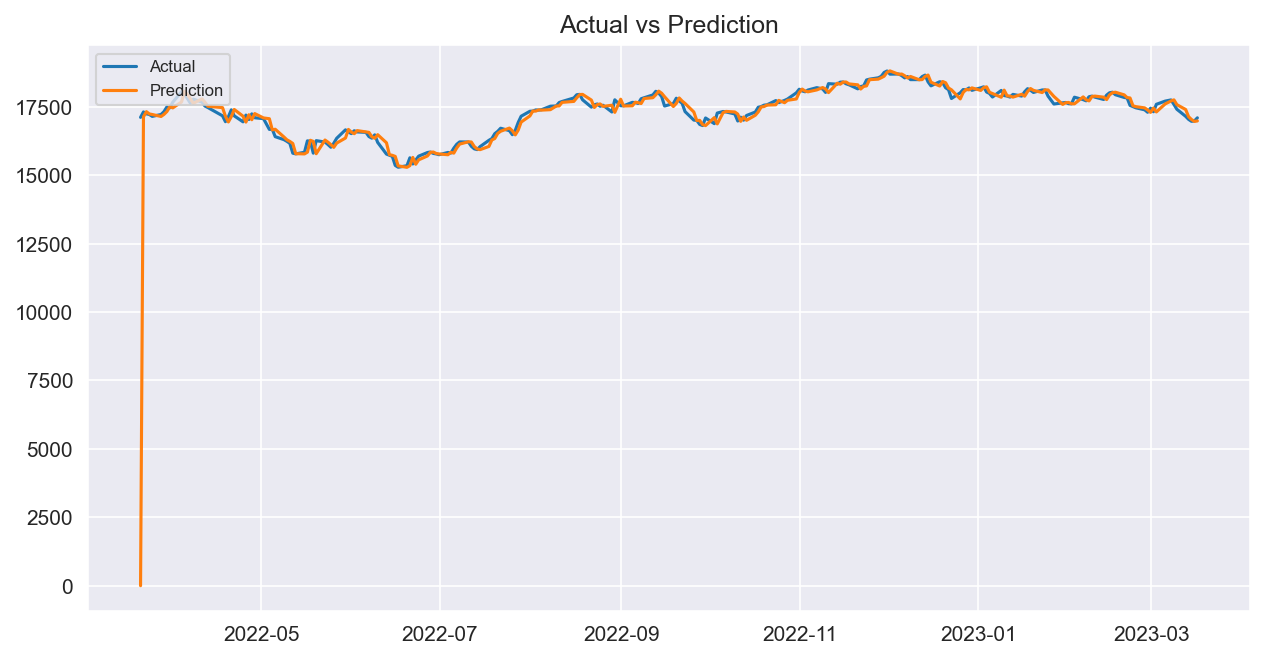

In [41]:
plt.figure(figsize=(10,5), dpi=150)
plt.plot(data_close['Close'], label='Actual')
plt.plot(prediction, label='Prediction')
plt.title('Actual vs Prediction')
plt.legend(loc='upper left', fontsize=8)
plt.show()

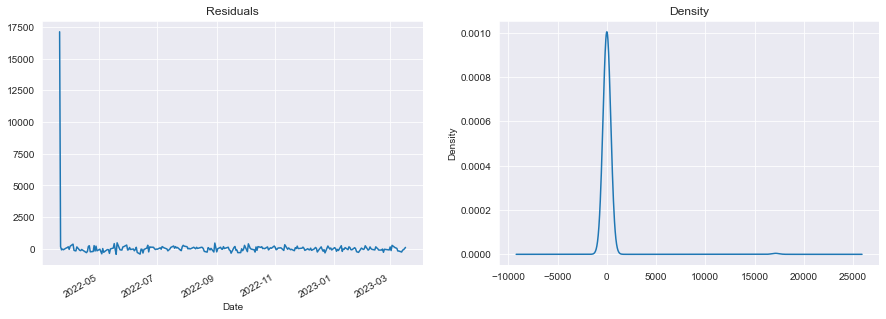

In [42]:
# Residual plot
residuals = arima_fit.resid

fig, axs = plt.subplots(1,2,figsize=(15,5))
residuals.plot(title="Residuals", ax=axs[0])
residuals.plot(kind='kde', title='Density', ax=axs[1])
plt.show()

In [43]:
data_close

Close
Date                                   
2022-03-21 00:00:00+05:30  17117.599609
2022-03-22 00:00:00+05:30  17315.500000
2022-03-23 00:00:00+05:30  17245.650391
2022-03-24 00:00:00+05:30  17222.750000
2022-03-25 00:00:00+05:30  17153.000000
...                                 ...
2023-03-13 00:00:00+05:30  17154.300781
2023-03-14 00:00:00+05:30  17043.300781
2023-03-15 00:00:00+05:30  16972.150391
2023-03-16 00:00:00+05:30  16985.599609
2023-03-17 00:00:00+05:30  17100.050781

[249 rows x 1 columns]

In [44]:
data_train = data_close[:200]
data_test = data_close[200:]

In [45]:
data_test.head()

Close
Date                                   
2023-01-06 00:00:00+05:30  17859.449219
2023-01-09 00:00:00+05:30  18101.199219
2023-01-10 00:00:00+05:30  17914.150391
2023-01-11 00:00:00+05:30  17895.699219
2023-01-12 00:00:00+05:30  17858.199219

In [46]:
model_arima = ARIMA(data_train['Close'],order=(2,1,0))
result = model_arima.fit()
result.summary()

C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  200
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1296.453
Date:                Sun, 19 Mar 2023   AIC                           2598.906
Time:                        22:40:25   BIC                           2608.786
Sample:                             0   HQIC                          2602.905
                                - 200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0444      0.062      0.712      0.476      -0.078       0.167
ar.L2         -0.0101      0.071     -0.143      0.886      -0.149       0.129
sigma2      2.676e+04   2518.454     10.626      0.000    2.18e+04    3.17e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.81
Prob(Q):                              0.83   Prob(JB):                         0.67
Heteroskedasticity (H):               0.45   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
test_pred = pd.DataFrame(result.predict(len(data_train),len(data_train)+48,typ='levels'))
test_pred.index = data_test.index
test_pred.columns=data_test.columns
test_pred.head()

C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Close
Date                                   
2023-01-06 00:00:00+05:30  17991.813087
2023-01-09 00:00:00+05:30  17992.312130
2023-01-10 00:00:00+05:30  17992.337705
2023-01-11 00:00:00+05:30  17992.333791
2023-01-12 00:00:00+05:30  17992.333358

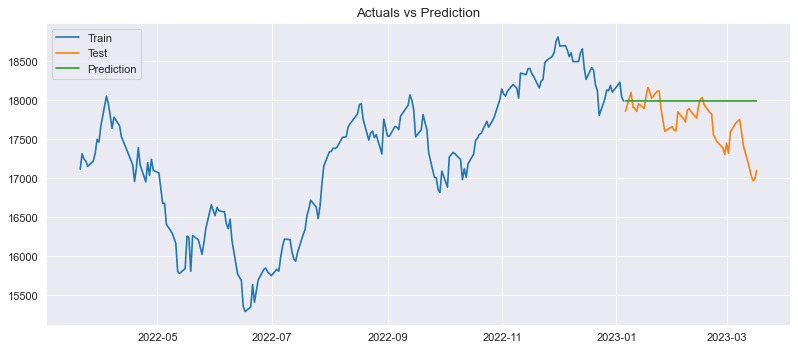

In [48]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(data_train, label = 'Train')
plt.plot(data_test, label='Test')
plt.plot(test_pred, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [49]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
mse = mean_squared_error(test_pred.Close,data_test.Close)
rmse = np.round(np.sqrt(mse),2)

In [50]:
mape = np.round(mean_absolute_percentage_error(test_pred.Close,data_test.Close),3)
print('\n RMSE = ',rmse)
print('\n MAPE = ', mape)


 RMSE =  420.02

 MAPE =  0.018


In [51]:
forecast = arima_fit.predict(len(data_close),len(data_close)+29,typ='levels')
forecast_df = pd.DataFrame(forecast)
forecast_df.columns=['Close']
forecast_df

C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Close
249  17105.580517
250  17105.847688
251  17105.860596
252  17105.861220
253  17105.861250
254  17105.861251
255  17105.861251
256  17105.861251
257  17105.861251
258  17105.861251
259  17105.861251
260  17105.861251
261  17105.861251
262  17105.861251
263  17105.861251
264  17105.861251
265  17105.861251
266  17105.861251
267  17105.861251
268  17105.861251
269  17105.861251
270  17105.861251
271  17105.861251
272  17105.861251
273  17105.861251
274  17105.861251
275  17105.861251
276  17105.861251
277  17105.861251
278  17105.861251

In [52]:
date = pd.date_range(z,periods=30, freq='B')
date_df = pd.DataFrame(date,columns=['Date'])

In [53]:
data_forecast = forecast_df.set_index(date_df.Date)
data_forecast

Close
Date                    
2023-03-20  17105.580517
2023-03-21  17105.847688
2023-03-22  17105.860596
2023-03-23  17105.861220
2023-03-24  17105.861250
2023-03-27  17105.861251
2023-03-28  17105.861251
2023-03-29  17105.861251
2023-03-30  17105.861251
2023-03-31  17105.861251
2023-04-03  17105.861251
2023-04-04  17105.861251
2023-04-05  17105.861251
2023-04-06  17105.861251
2023-04-07  17105.861251
2023-04-10  17105.861251
2023-04-11  17105.861251
2023-04-12  17105.861251
2023-04-13  17105.861251
2023-04-14  17105.861251
2023-04-17  17105.861251
2023-04-18  17105.861251
2023-04-19  17105.861251
2023-04-20  17105.861251
2023-04-21  17105.861251
2023-04-24  17105.861251
2023-04-25  17105.861251
2023-04-26  17105.861251
2023-04-27  17105.861251
2023-04-28  17105.861251

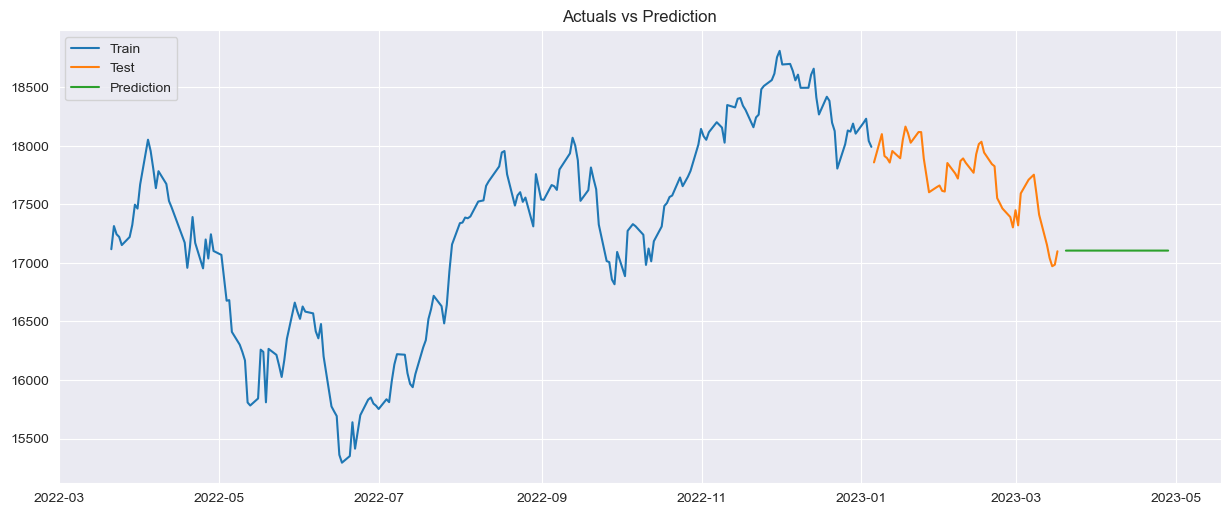

In [54]:
plt.figure(figsize=(15,6), dpi=100)
plt.plot(data_train, label = 'Train')
plt.plot(data_test, label='Test')
plt.plot(data_forecast, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

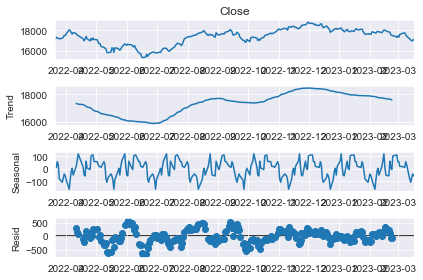

In [55]:
sd = seasonal_decompose(data_close['Close'],period=30)
sd.plot()
plt.show()

Sarimax  model

In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

model_sarima = sm.tsa.SARIMAX(data_train.Close,order=(2,1,0),seasonal_order=(1,1,0,12),enforce_invertibility=False,enforce_stationarity=False)
sarima_fit = model_sarima.fit()

C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [57]:
sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  200
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 12)   Log Likelihood               -1157.513
Date:                            Sun, 19 Mar 2023   AIC                           2323.026
Time:                                    22:40:27   BIC                           2335.639
Sample:                                         0   HQIC                          2328.143
                                            - 200                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0586      0.073      0.803      0.422      -0.085       0.202
ar.L2          0.0419      0.086      0.487      0.626      -0.127       0.210
ar.S.L12      -0.5738      0.060     -9.547      0.000      -0.692      -0.456
sigma2      3.794e+04   3688.608     10.286      0.000    3.07e+04    4.52e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.55
Prob(Q):                              0.95   Prob(JB):                         0.17
Heteroskedasticity (H):               0.51   Skew:                             0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
# Predicting for data_test
prediction = sarima_fit.predict(len(data_train),len(data_train)+48)
prediction

C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



200    17905.494945
201    17842.166398
202    17657.974169
203    17774.571886
204    17760.020054
205    17756.158574
206    17848.958902
207    17842.446676
208    17740.903058
209    17672.142207
210    17678.242153
211    17636.423820
212    17492.647119
213    17424.486180
214    17162.049906
215    17330.980579
216    17392.318069
217    17385.048503
218    17463.904835
219    17411.953586
220    17421.554202
221    17412.391606
222    17306.194255
223    17259.222741
224    17148.223316
225    17082.835298
226    16865.296964
227    17004.197979
228    17021.988713
229    17016.674773
230    17103.532438
231    17077.654976
232    17023.478889
233    16980.117665
234    16938.358668
235    16894.344149
236    16764.536491
237    16697.557317
238    16454.255680
239    16610.388291
240    16653.166993
241    16646.730877
242    16728.997223
243    16688.158120
244    16670.578334
245    16646.840942
246    16568.105975
247    16522.394676
248    16403.379545
Name: predicted_mean

In [59]:
test_prediction= pd.DataFrame(prediction)
test_prediction.columns = ['Close']
test_prediction.index = data_test.index
test_prediction

Close
Date                                   
2023-01-06 00:00:00+05:30  17905.494945
2023-01-09 00:00:00+05:30  17842.166398
2023-01-10 00:00:00+05:30  17657.974169
2023-01-11 00:00:00+05:30  17774.571886
2023-01-12 00:00:00+05:30  17760.020054
2023-01-13 00:00:00+05:30  17756.158574
2023-01-16 00:00:00+05:30  17848.958902
2023-01-17 00:00:00+05:30  17842.446676
2023-01-18 00:00:00+05:30  17740.903058
2023-01-19 00:00:00+05:30  17672.142207
2023-01-20 00:00:00+05:30  17678.242153
2023-01-23 00:00:00+05:30  17636.423820
2023-01-24 00:00:00+05:30  17492.647119
2023-01-25 00:00:00+05:30  17424.486180
2023-01-27 00:00:00+05:30  17162.049906
2023-01-30 00:00:00+05:30  17330.980579
2023-01-31 00:00:00+05:30  17392.318069
2023-02-01 00:00:00+05:30  17385.048503
2023-02-02 00:00:00+05:30  17463.904835
2023-02-03 00:00:00+05:30  17411.953586
2023-02-06 00:00:00+05:30  17421.554202
2023-02-07 00:00:00+05:30  17412.391606
2023-02-08 00:00:00+05:30  17306.194255
2023-02-09 00:00:00+05:30  17259.222741
2023-02-10 00:00:00+05:30  17148.223316
2023-02-13 00:00:00+05:30  17082.835298
2023-02-14 00:00:00+05:30  16865.296964
2023-02-15 00:00:00+05:30  17004.197979
2023-02-16 00:00:00+05:30  17021.988713
2023-02-17 00:00:00+05:30  17016.674773
2023-02-20 00:00:00+05:30  17103.532438
2023-02-21 00:00:00+05:30  17077.654976
2023-02-22 00:00:00+05:30  17023.478889
2023-02-23 00:00:00+05:30  16980.117665
2023-02-24 00:00:00+05:30  16938.358668
2023-02-27 00:00:00+05:30  16894.344149
2023-02-28 00:00:00+05:30  16764.536491
2023-03-01 00:00:00+05:30  16697.557317
2023-03-02 00:00:00+05:30  16454.255680
2023-03-03 00:00:00+05:30  16610.388291
2023-03-06 00:00:00+05:30  16653.166993
2023-03-08 00:00:00+05:30  16646.730877
2023-03-09 00:00:00+05:30  16728.997223
2023-03-10 00:00:00+05:30  16688.158120
2023-03-13 00:00:00+05:30  16670.578334
2023-03-14 00:00:00+05:30  16646.840942
2023-03-15 00:00:00+05:30  16568.105975
2023-03-16 00:00:00+05:30  16522.394676
2023-03-17 00:00:00+05:30  16403.379545

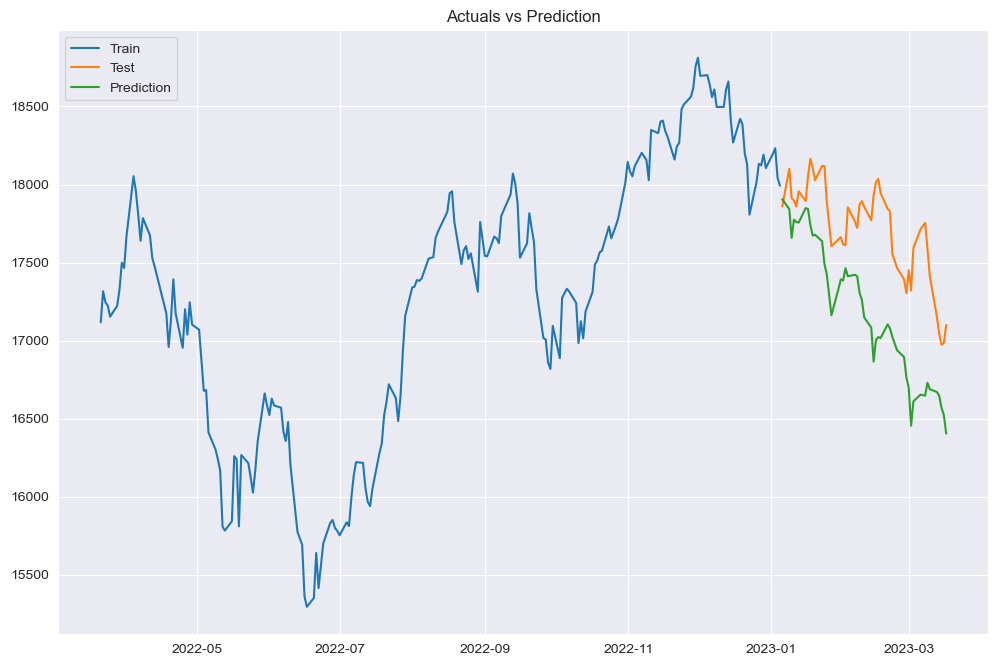

In [60]:
plt.figure(figsize=(12,8), dpi=100)
plt.plot(data_train, label = 'Train')
plt.plot(data_test, label='Test')
plt.plot(test_prediction, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

In [61]:
rmse = np.round(np.sqrt(mean_squared_error(data_test.Close,test_prediction.Close)),2)
mape = np.round(mean_absolute_percentage_error(test_prediction.Close,data_test.Close),3)

print('\n RMSE = ',rmse)
print('\n MAPE = ', mape)


 RMSE =  603.1

 MAPE =  0.031


In [62]:
# Forecasting for next 30 days
forecast = sarima_fit.predict(len(data_close),len(data_close)+29)
forecast_df = pd.DataFrame(forecast)
forecast_df.columns = ['Close']
forecast_df

C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Close
249  16337.313406
250  16108.795249
251  16255.040038
252  16283.480163
253  16277.687973
254  16362.588906
255  16330.335081
256  16291.755632
257  16256.757708
258  16199.240265
259  16154.502610
260  16029.294519
261  15962.704464
262  15725.703261
263  15877.621873
264  15914.289750
265  15908.128062
266  15991.517219
267  15954.336996
268  15927.807558
269  15899.271144
270  15829.578677
271  15784.282326
272  15662.627875
273  15596.338453
274  15364.204986
275  15512.867848
276  15544.814483
277  15538.864820
278  15623.121463

In [63]:
# Set appropriate date as index for plotting forecast data
datetime = pd.date_range(z, periods=30,freq='B')
date_df = pd.DataFrame(datetime,columns=['Date'])

data_forecast = forecast_df.set_index(date_df.Date)
data_forecast

Close
Date                    
2023-03-20  16337.313406
2023-03-21  16108.795249
2023-03-22  16255.040038
2023-03-23  16283.480163
2023-03-24  16277.687973
2023-03-27  16362.588906
2023-03-28  16330.335081
2023-03-29  16291.755632
2023-03-30  16256.757708
2023-03-31  16199.240265
2023-04-03  16154.502610
2023-04-04  16029.294519
2023-04-05  15962.704464
2023-04-06  15725.703261
2023-04-07  15877.621873
2023-04-10  15914.289750
2023-04-11  15908.128062
2023-04-12  15991.517219
2023-04-13  15954.336996
2023-04-14  15927.807558
2023-04-17  15899.271144
2023-04-18  15829.578677
2023-04-19  15784.282326
2023-04-20  15662.627875
2023-04-21  15596.338453
2023-04-24  15364.204986
2023-04-25  15512.867848
2023-04-26  15544.814483
2023-04-27  15538.864820
2023-04-28  15623.121463

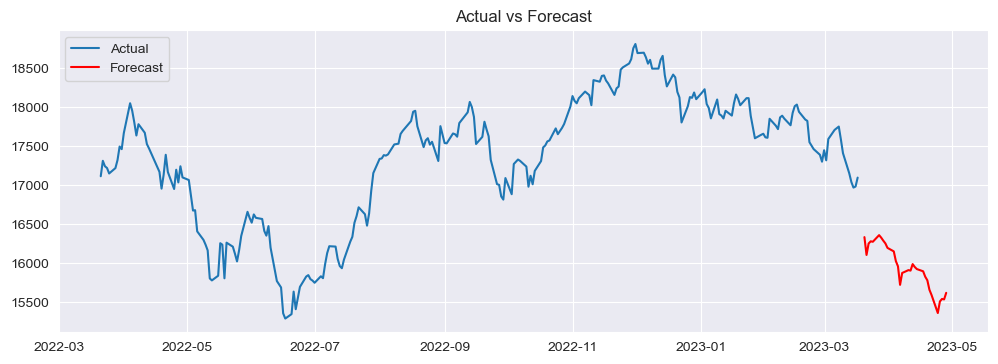

In [64]:
plt.figure(figsize=(12,4), dpi=100)
plt.plot(data_close, label = 'Actual')
plt.plot(data_forecast, label='Forecast',color='red')
plt.title('Actual vs Forecast')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()